In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
db=pd.read_csv("/config/workspace/prediction_maintainanance_ml/data/predictive_maintenance.csv")

In [35]:
db

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [36]:
len(db)

10000

In [37]:
db.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [38]:
db.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


##Drop the variable

In [39]:
db.drop(['Failure Type','Product ID','Type'],axis=1,inplace=True)

In [40]:
db

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,3,298.1,308.5,1498,49.4,5,0
3,4,298.2,308.6,1433,39.5,7,0
4,5,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0
9996,9997,298.9,308.4,1632,31.8,17,0
9997,9998,299.0,308.6,1645,33.4,22,0
9998,9999,299.0,308.7,1408,48.5,25,0


##Renaming the dataset

In [41]:
db.columns = ['UDI','Air_Temp','Process_temperature','Ratational_speed','Torque','Tool_wear','Target']

In [42]:
db

,UDI,Air_Temp,Process_temperature,Ratational_speed,Torque,Tool_wear,Target
0,1,298.1,308.6,1551,42.8,0,0
1,2,298.2,308.7,1408,46.3,3,0
2,3,298.1,308.5,1498,49.4,5,0
3,4,298.2,308.6,1433,39.5,7,0
4,5,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0
9996,9997,298.9,308.4,1632,31.8,17,0
9997,9998,299.0,308.6,1645,33.4,22,0
9998,9999,299.0,308.7,1408,48.5,25,0


In [43]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Air_Temp             10000 non-null  float64
 2   Process_temperature  10000 non-null  float64
 3   Ratational_speed     10000 non-null  int64  
 4   Torque               10000 non-null  float64
 5   Tool_wear            10000 non-null  int64  
 6   Target               10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [44]:
db.shape

(10000, 7)

In [45]:
db.isnull().sum()

UDI                    0
Air_Temp               0
Process_temperature    0
Ratational_speed       0
Torque                 0
Tool_wear              0
Target                 0
dtype: int64

In [46]:
db.duplicated().sum()

0

In [47]:
db.describe()

,UDI,Air_Temp,Process_temperature,Ratational_speed,Torque,Tool_wear,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


##Train_test_split

In [48]:
# Split the data into features and target
from sklearn.model_selection import train_test_split
X = db.drop("Target", axis=1)
y = db["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

/tmp/ipykernel_1300/2737513334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


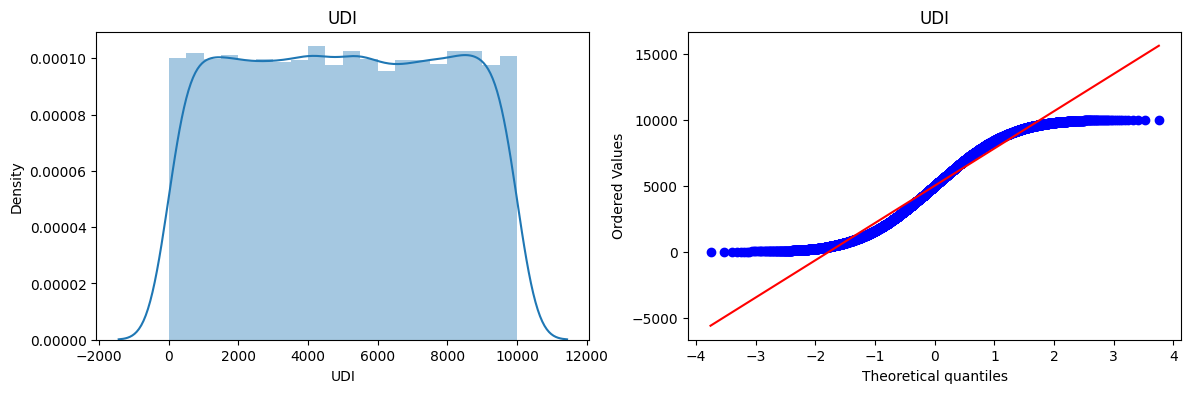

/tmp/ipykernel_1300/2737513334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


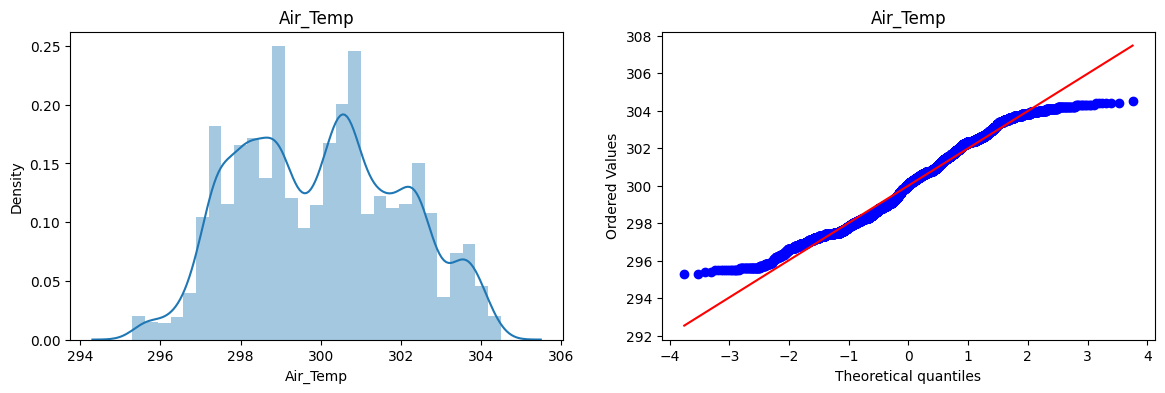

/tmp/ipykernel_1300/2737513334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


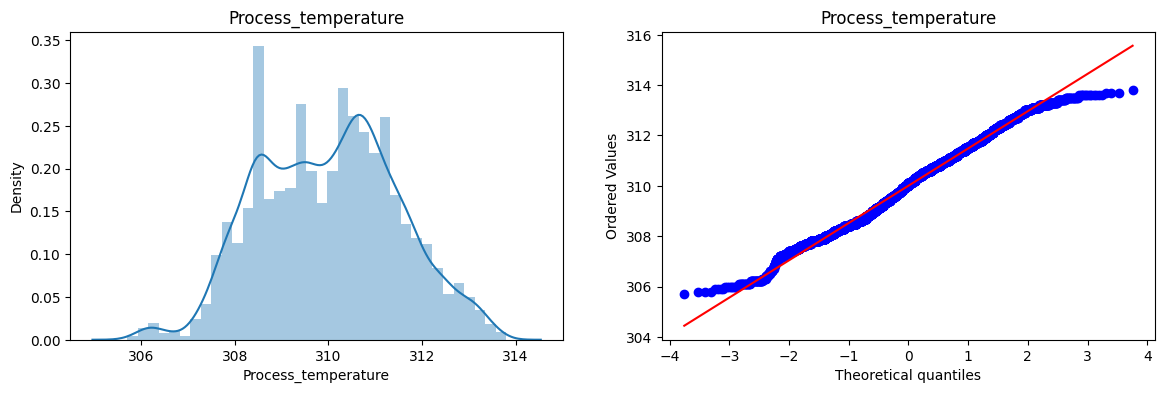

/tmp/ipykernel_1300/2737513334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


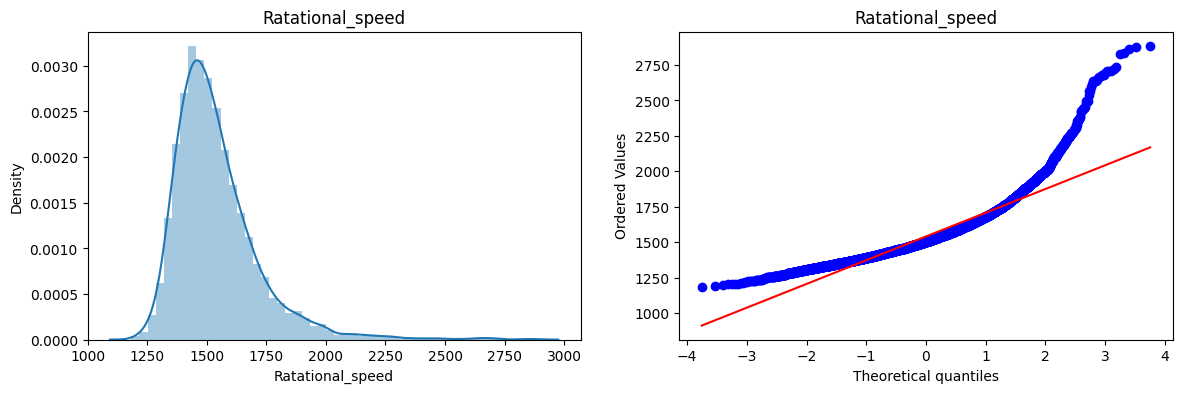

/tmp/ipykernel_1300/2737513334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


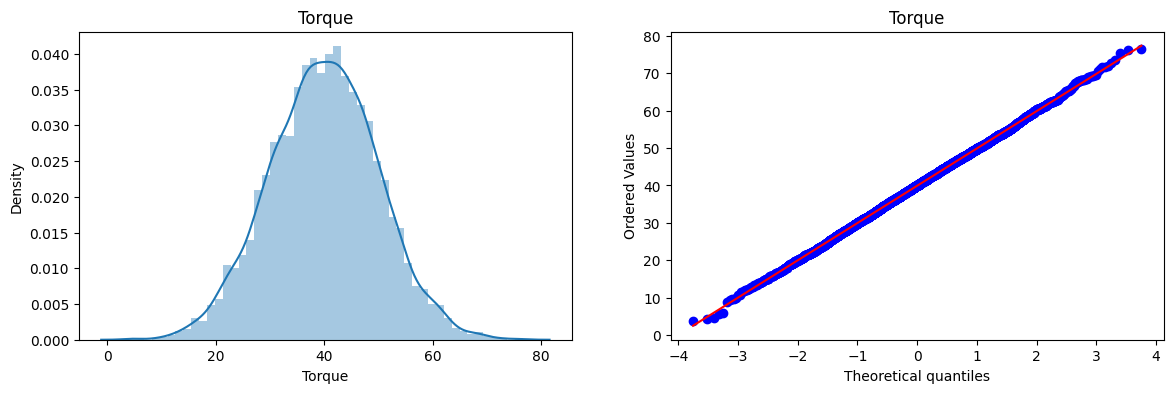

/tmp/ipykernel_1300/2737513334.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


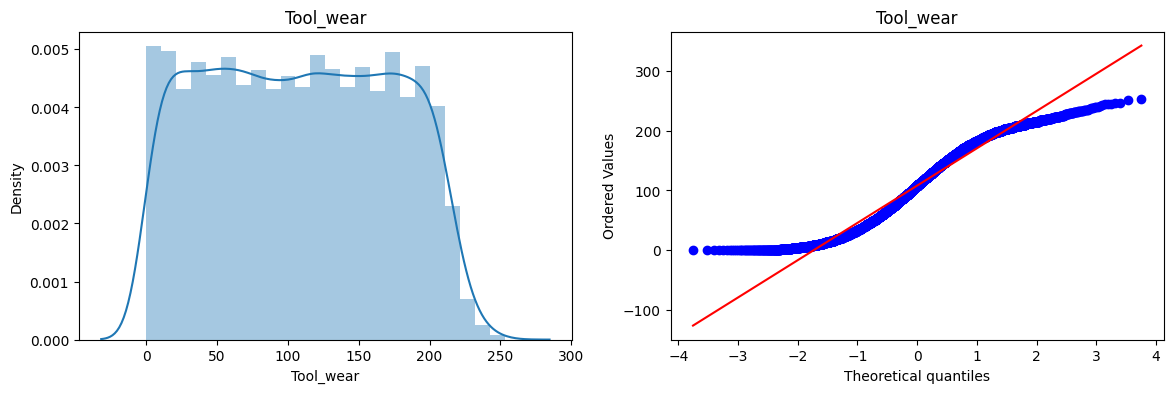

In [49]:
# input_features (input)
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
 
    
    
#     # QQ plot
    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm',plot=plt)
    plt.title(col)
    plt.show()
    

##Standard Scaler

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)


In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score


# Define the regression models
models = {
    'lin_reg': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'rf_reg': RandomForestRegressor(n_estimators=100, random_state=42),
    'xgb_reg': XGBRegressor(),
    
}




for name ,model in models.items():
    model.fit(X_train_transformed,y_train)
    y_pred = model.predict(X_test_transoformed)
    
    print(f"{name} : {r2_score(y_test,y_pred)}")
   

lin_reg : 0.11569733719682851
ridge : 0.11570705336693554
lasso : -0.0003003461978658972
rf_reg : 0.6240163217720782
xgb_reg : 0.5782398365098168


In [52]:
rf = RandomForestRegressor()
rf.fit(X_train_transformed,y_train)
y_pred = rf.predict(X_test_transoformed)
r2_score(y_test,y_pred)

0.6055718662695226

In [53]:
import pickle
pickle.dump(rf,open('rf_model.pkl','wb'))
pickle.dump(scaler,open('st_scaler.pkl','wb'))

In [54]:
def predicion_system(UDI,Air_Temp,Process_temperature,Ratational_speed,Torque,Tool_wear):
    features = [[UDI,Air_Temp,Process_temperature,Ratational_speed,Torque,Tool_wear]]
    prediction = rf.predict(features)
    
    return prediction[0]

In [61]:
UDI=1
Air_Temp=8.1
Process_temperature=306
Ratational_speed=15
Torque=42
Tool_wear=1
prediction = predicion_system(UDI,Air_Temp,Process_temperature,Ratational_speed,Torque,Tool_wear)
print("strength is : ",prediction)

strength is :  1.0
